# JUICE JUNCTION BUISNESS EDA

## Buisness Problems-

1)Which month has the highest total sales?

2)What are the top 5 selling items overall?

3)Which payment type contributes the most revenue?

4)How does inventory affect daily sales?

#Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/chari/OneDrive/Desktop/MY WORK/Juice-Junction-Buisness/Juice_Junction_buisness_sales.csv")
df

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock
0,"Monday, 21 August 2023",Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91
1,"Sunday, 4 August 2024",Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30
2,"Tuesday, 20 February 2024",Chats,Masala Puri,P007,4,137,548,C5858,Card,35
3,"Thursday, 25 April 2024",Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47
4,"Friday, 10 November 2023",Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8
...,...,...,...,...,...,...,...,...,...,...
6995,"Wednesday, 26 July 2023",Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23
6996,"Friday, 17 February 2023",Chats,Pani Puri,P005,2,109,218,C9028,Card,28
6997,"Tuesday, 23 May 2023",Shakes,Mango Shake,P015,4,132,528,C9295,Card,95
6998,"Friday, 22 December 2023",Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68


#Overview of my Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order Date       7000 non-null   object
 1   Category         7000 non-null   object
 2   Item             7000 non-null   object
 3   Product_ID       7000 non-null   object
 4   Quantity         7000 non-null   int64 
 5   Price            7000 non-null   int64 
 6    Total Sales     7000 non-null   int64 
 7   Customer_ID      7000 non-null   object
 8   Payment_Type     7000 non-null   object
 9   Inventory_Stock  7000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 547.0+ KB


#Data Clean Up

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock
0,2023-08-21,Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91
1,2024-08-04,Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30
2,2024-02-20,Chats,Masala Puri,P007,4,137,548,C5858,Card,35
3,2024-04-25,Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47
4,2023-11-10,Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8
...,...,...,...,...,...,...,...,...,...,...
6995,2023-07-26,Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23
6996,2023-02-17,Chats,Pani Puri,P005,2,109,218,C9028,Card,28
6997,2023-05-23,Shakes,Mango Shake,P015,4,132,528,C9295,Card,95
6998,2023-12-22,Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68


In [6]:
df_DA = df

In [7]:
df_DA['Order_Month'] = df_DA['Order Date'].dt.strftime('%b')
df_DA['Order_Year'] = df_DA['Order Date'].dt.year
df_DA['Order_Day'] = df_DA['Order Date'].dt.day_name()
df_DA

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock,Order_Month,Order_Year,Order_Day
0,2023-08-21,Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91,Aug,2023,Monday
1,2024-08-04,Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30,Aug,2024,Sunday
2,2024-02-20,Chats,Masala Puri,P007,4,137,548,C5858,Card,35,Feb,2024,Tuesday
3,2024-04-25,Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47,Apr,2024,Thursday
4,2023-11-10,Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8,Nov,2023,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2023-07-26,Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23,Jul,2023,Wednesday
6996,2023-02-17,Chats,Pani Puri,P005,2,109,218,C9028,Card,28,Feb,2023,Friday
6997,2023-05-23,Shakes,Mango Shake,P015,4,132,528,C9295,Card,95,May,2023,Tuesday
6998,2023-12-22,Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68,Dec,2023,Friday


## 1)Which month has the highest total sales?

In [8]:
df_DA_Sum_Sales = df_DA[' Total Sales '].sum()

In [9]:
df_DA_Sum_Sales

np.int64(1770293)

In [10]:
df_DA_Avg_Month_Sales = df_DA.pivot_table(index= 'Order_Month', values= ' Total Sales ', aggfunc= 'mean')
df_DA_Avg_Month_Sales

,Total Sales
Order_Month,
Apr,250.444628
Aug,251.447140
Dec,259.738916
Feb,252.623047
Jan,254.143847
Jul,264.380645
Jun,244.222222
Mar,257.413621
May,245.207792


In [11]:
df_DA_Avg_Month_Sales.reset_index(inplace=True)

In [12]:
df_DA_Avg_Month_Sales['Month_Num'] = pd.to_datetime(df_DA_Avg_Month_Sales['Order_Month'], format= '%b').dt.month

In [13]:
df_DA_Avg_Month_Sales

,Order_Month,Total Sales,Month_Num
0,Apr,250.444628,4
1,Aug,251.447140,8
2,Dec,259.738916,12
3,Feb,252.623047,2
4,Jan,254.143847,1
5,Jul,264.380645,7
6,Jun,244.222222,6
7,Mar,257.413621,3
8,May,245.207792,5
9,Nov,243.239777,11


In [14]:
df_DA_Avg_Month_Sales.sort_values('Month_Num', inplace=True)

In [15]:
df_DA_Avg_Month_Sales

,Order_Month,Total Sales,Month_Num
4,Jan,254.143847,1
3,Feb,252.623047,2
7,Mar,257.413621,3
0,Apr,250.444628,4
8,May,245.207792,5
6,Jun,244.222222,6
5,Jul,264.380645,7
1,Aug,251.447140,8
11,Sep,250.304498,9
10,Oct,259.739566,10


In [16]:
df_DA_Avg_Month_Sales.set_index('Order_Month',inplace=True)

In [17]:
df_DA_Avg_Month_Sales

,Total Sales,Month_Num
Order_Month,,
Jan,254.143847,1
Feb,252.623047,2
Mar,257.413621,3
Apr,250.444628,4
May,245.207792,5
Jun,244.222222,6
Jul,264.380645,7
Aug,251.447140,8
Sep,250.304498,9


In [18]:
df_DA_Avg_Month_Sales.drop(columns= 'Month_Num',inplace=True)

In [19]:
df_DA_Avg_Month_Sales

,Total Sales
Order_Month,
Jan,254.143847
Feb,252.623047
Mar,257.413621
Apr,250.444628
May,245.207792
Jun,244.222222
Jul,264.380645
Aug,251.447140
Sep,250.304498


#Visualize

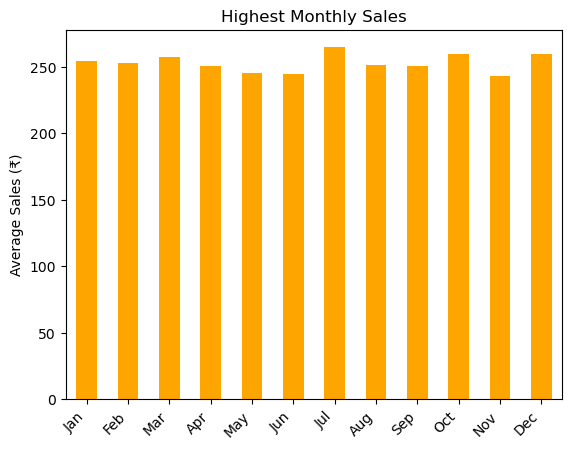

Total Sales     264.380645
dtype: float64 Total Sales     Jul
dtype: object


In [20]:
df_DA_Avg_Month_Sales.plot(kind= 'bar', color= 'Orange')
plt.title("Highest Monthly Sales")
plt.xlabel(" ")
plt.xticks(rotation= 45, ha= 'right')
plt.ylabel("Average Sales (₹)")
plt.legend().remove()
plt.show()

print(df_DA_Avg_Month_Sales.max(),df_DA_Avg_Month_Sales.idxmax())

# Insights:

- Highest Month which has highest Avg sales- July with Avg sales= 264.380645

## 2)What are the top 5 selling items overall?

In [21]:
df_DA_Items = df

In [22]:
df_DA_Items_pivot = df_DA_Items.pivot_table(index= 'Item', values= ' Total Sales ', aggfunc= 'mean')
df_DA_Items_pivot.sort_values(by= ' Total Sales ', ascending=False,inplace=True)
df_DA_Items_pivot

,Total Sales
Item,
Mango Shake,272.519553
Samosa,269.282486
Vanilla Ice Cream,263.247887
Butterscotch Ice Cream,261.969945
French Fries,259.585106
Pani Puri,258.352151
Pakora,256.187151
Masala Puri,255.032086
Mango Juice,254.763889


In [23]:
top_5_Items = df_DA_Items_pivot.head()
top_5_Items

,Total Sales
Item,
Mango Shake,272.519553
Samosa,269.282486
Vanilla Ice Cream,263.247887
Butterscotch Ice Cream,261.969945
French Fries,259.585106


#Visualize

C:\Users\chari\AppData\Local\Temp\ipykernel_15068\1266040187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_5_Items, x= ' Total Sales ', y= 'Item', palette= 'viridis')


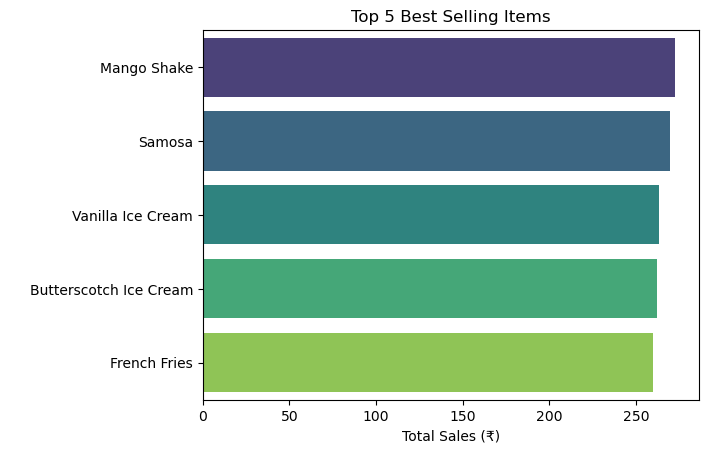

In [24]:
sns.barplot(data= top_5_Items, x= ' Total Sales ', y= 'Item', palette= 'viridis')
plt.title("Top 5 Best Selling Items")
plt.ylabel(" ")
plt.xlabel("Total Sales (₹)")
plt.show()

# Insights:

In [25]:
print("Top 5 Items are:", top_5_Items)

Top 5 Items are:                         Total Sales 
Item                                
Mango Shake               272.519553
Samosa                    269.282486
Vanilla Ice Cream         263.247887
Butterscotch Ice Cream    261.969945
French Fries              259.585106


## 3)Which payment type contributes the most revenue?

In [26]:
df_DA_Payment = df

In [27]:
df_DA_Payment_pivot = df_DA_Payment.pivot_table(index= 'Payment_Type', values= ' Total Sales ', aggfunc= 'mean')
df_DA_Payment_pivot.sort_values(by= ' Total Sales ', ascending=False, inplace=True)
df_DA_Payment_pivot

,Total Sales
Payment_Type,
Card,260.572743
UPI,256.152322
Wallet,249.772913
Cash,245.191358


#Visualize

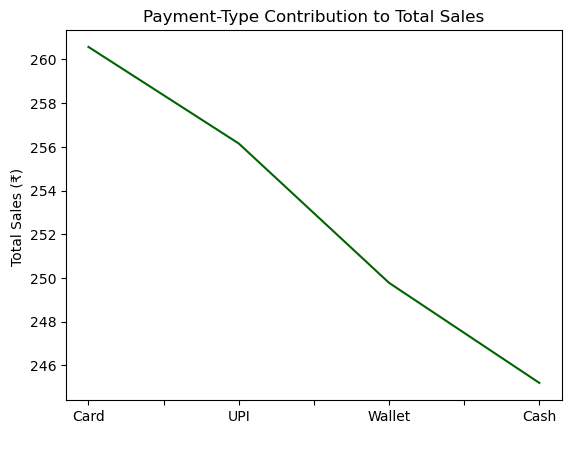

In [28]:
df_DA_Payment_pivot.plot(kind= 'line', color= 'darkgreen')
plt.title("Payment-Type Contribution to Total Sales")
plt.xlabel(" ")
plt.ylabel("Total Sales (₹) ")
plt.legend().remove()
plt.show()

# Insights:

- Card transactions contribute the highest to Total Sales whereas Cash transactions contribute least.

## 4)How does inventory affect daily sales?

In [29]:
df_DA_Inventory = df

In [30]:
df_DA_Inventory

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock,Order_Month,Order_Year,Order_Day
0,2023-08-21,Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91,Aug,2023,Monday
1,2024-08-04,Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30,Aug,2024,Sunday
2,2024-02-20,Chats,Masala Puri,P007,4,137,548,C5858,Card,35,Feb,2024,Tuesday
3,2024-04-25,Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47,Apr,2024,Thursday
4,2023-11-10,Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8,Nov,2023,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2023-07-26,Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23,Jul,2023,Wednesday
6996,2023-02-17,Chats,Pani Puri,P005,2,109,218,C9028,Card,28,Feb,2023,Friday
6997,2023-05-23,Shakes,Mango Shake,P015,4,132,528,C9295,Card,95,May,2023,Tuesday
6998,2023-12-22,Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68,Dec,2023,Friday


In [31]:
df_DA_Daily_Sales = df_DA_Inventory.pivot_table(index= 'Order_Day', values= ' Total Sales ', aggfunc= 'sum')

In [32]:
df_DA_Daily_Sales

,Total Sales
Order_Day,
Friday,246297
Monday,261304
Saturday,253651
Sunday,257946
Thursday,238081
Tuesday,262380
Wednesday,250634


In [33]:
df_DA_Daily_Sales.sort_values(' Total Sales ', ascending=False)

,Total Sales
Order_Day,
Tuesday,262380
Monday,261304
Sunday,257946
Saturday,253651
Wednesday,250634
Friday,246297
Thursday,238081


In [34]:
df_DA_Inv = df.groupby('Order_Day').agg({'Inventory_Stock':'mean', ' Total Sales ':'sum'}).reset_index()

In [35]:
df_DA_Inv

,Order_Day,Inventory_Stock,Total Sales
0,Friday,51.772217,246297
1,Monday,51.175558,261304
2,Saturday,52.491853,253651
3,Sunday,50.238514,257946
4,Thursday,52.552605,238081
5,Tuesday,52.985986,262380
6,Wednesday,52.758689,250634


#Visualize

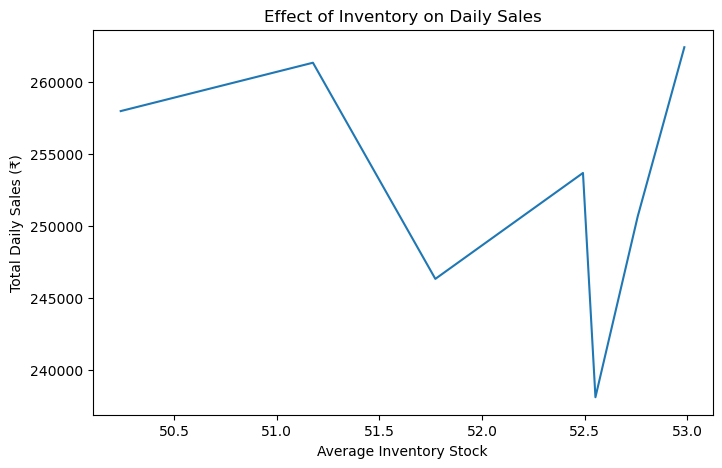

In [36]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_DA_Inv, x='Inventory_Stock', y=' Total Sales ')
plt.title("Effect of Inventory on Daily Sales")
plt.xlabel("Average Inventory Stock")
plt.ylabel("Total Daily Sales (₹)")
plt.show()

# Insights:

In [37]:
corr = df_DA_Inv['Inventory_Stock'].corr(df_DA_Inv[' Total Sales '])
print("Correlation between Inventory and Sales:", round(corr, 2))

Correlation between Inventory and Sales: -0.28


- The inventory and sales are negitively corelated, that is when inventory is increasing sales is decreasing.